In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import cluster lib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [78]:
#import with dummies 
telco_final = pd.read_csv('../data/telco_final.csv')

pd.set_option('display.max_columns',99)

In [79]:
telco_final.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,pop_density,new_user
0,0,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,1,0,0,DSL,0,0,1,0,0,1,1,1,Electronic check,1,100,5433,Competitor offered more data,0,0,1,None,0.00,DSL,8,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1,Competitor,15334,0
1,1,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,8,1,1,Fiber optic,0,1,0,0,0,0,1,1,Credit card (automatic),1,69,5302,Competitor made better offer,1,1,8,Offer E,48.85,Fiber Optic,17,0,1,80.65,633.30,0.00,0,390.80,1024.10,3,1,Competitor,17038,0
2,0,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,18,1,1,Fiber optic,0,0,0,0,1,1,1,1,Electronic check,1,81,3179,Competitor made better offer,0,0,18,Offer D,11.33,Fiber Optic,52,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,1,Competitor,8625,0
3,1,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,25,1,0,Fiber optic,0,1,1,0,1,1,1,1,Electronic check,1,88,5337,Limited range of services,1,1,25,Offer C,19.76,Fiber Optic,12,0,1,98.50,2514.50,13.43,0,494.00,2995.07,2,1,Dissatisfaction,11799,0
4,1,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,37,1,1,Fiber optic,0,0,0,0,0,0,1,1,Electronic check,1,67,2793,Extra data charges,1,1,37,Offer C,6.33,Fiber Optic,14,0,1,76.50,2868.15,0.00,0,234.21,3102.36,2,1,Price,6947,0


In [80]:
telco_final[['tenure_months','contract','churn_score','cltv','customer_status','new_user']]

,tenure_months,contract,churn_score,cltv,customer_status,new_user
0,1,1,100,5433,1,0
1,8,1,69,5302,1,0
2,18,1,81,3179,1,0
3,25,1,88,5337,1,0
4,37,1,67,2793,1,0
...,...,...,...,...,...,...
7038,72,24,45,5306,0,0
7039,24,12,59,2140,0,0
7040,72,12,71,5560,0,0
7041,11,1,59,2793,0,0


In [103]:
ver_col = ['churn_value','churn_score','customer_status', 'new_user','satisfaction_score','pop_density']

In [82]:
clus_col = ['age', 'under_30', 'senior_citizen', 'married', 'dependents',
            'number_of_dependents', 'tenure_months', 'phone_service','multiple_lines',
            'internet_service', 'online_security','online_backup', 
            'device_protection', 'tech_support', 'streaming_tv',
            'streaming_movies', 'contract', 'paperless_billing', 'payment_method','cltv', 
            'referred_a_friend', 'number_of_referrals', 'offer', 'internet_type',
            'streaming_music', 'unlimited_data', 'monthly_charge', 
            'total_charges','total_extra_data_charges', 'total_long_distance_charges','total_revenue']

In [83]:
telco_clus = telco_final[clus_col]

# OHE

In [84]:
#OHE clustering columns
telco_clus = pd.get_dummies(data=telco_clus, drop_first=True)

# KMeans

In [85]:
#standardisation
X_sc = StandardScaler().fit_transform(telco_clus)

In [86]:
#inspect k

scores = []
for k in range(2, 10):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df

,k,inertia,silhouette
0,2,241050.898775,0.141227
1,3,212809.860896,0.147804
2,4,198546.752355,0.146268
3,5,191338.739003,0.136665
4,6,185742.224512,0.111250
5,7,180890.805423,0.097871
6,8,176340.604878,0.099473
7,9,172676.911562,0.101983


Text(0.5, 1.0, 'Silhouette Score over k')

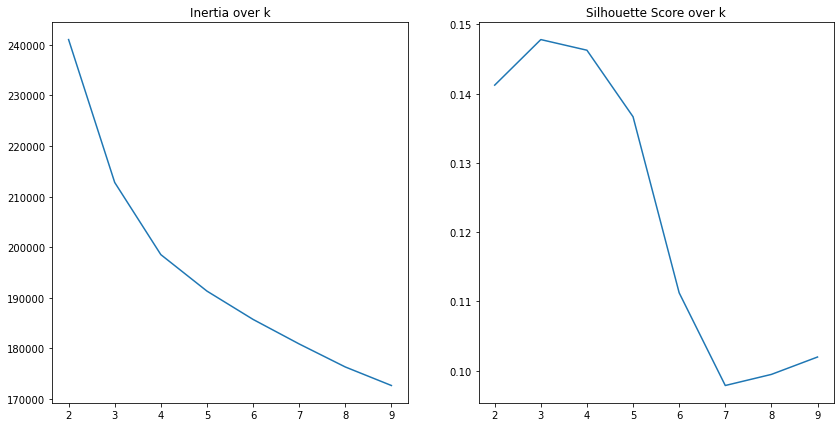

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [88]:

#instantiate with 4 cluster
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_sc)

#labels to cluster
telco_final['cluster'] = km.labels_
telco_final.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,pop_density,new_user,cluster
0,0,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,1,0,0,DSL,0,0,1,0,0,1,1,1,Electronic check,1,100,5433,Competitor offered more data,0,0,1,None,0.00,DSL,8,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1,Competitor,15334,0,2
1,1,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,8,1,1,Fiber optic,0,1,0,0,0,0,1,1,Credit card (automatic),1,69,5302,Competitor made better offer,1,1,8,Offer E,48.85,Fiber Optic,17,0,1,80.65,633.30,0.00,0,390.80,1024.10,3,1,Competitor,17038,0,1
2,0,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,18,1,1,Fiber optic,0,0,0,0,1,1,1,1,Electronic check,1,81,3179,Competitor made better offer,0,0,18,Offer D,11.33,Fiber Optic,52,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,1,Competitor,8625,0,1
3,1,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,25,1,0,Fiber optic,0,1,1,0,1,1,1,1,Electronic check,1,88,5337,Limited range of services,1,1,25,Offer C,19.76,Fiber Optic,12,0,1,98.50,2514.50,13.43,0,494.00,2995.07,2,1,Dissatisfaction,11799,0,1
4,1,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,37,1,1,Fiber optic,0,0,0,0,0,0,1,1,Electronic check,1,67,2793,Extra data charges,1,1,37,Offer C,6.33,Fiber Optic,14,0,1,76.50,2868.15,0.00,0,234.21,3102.36,2,1,Price,6947,0,1


In [89]:
#remove location 
telco_final = telco_final.drop(columns=['zip_code','latitude','longitude'])

In [90]:
clusters = telco_final.groupby('cluster').mean()

In [91]:
clusters

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,churn_value,churn_score,cltv,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,pop_density,new_user
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.489849,42.773412,0.225933,0.034054,0.483955,0.369352,0.750491,30.565160,1.000000,0.223969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.239031,0.292731,0.074001,52.737394,4374.817944,0.455141,2.177472,30.604453,24.972443,0.016372,0.000000,0.000000,21.094270,664.608703,1.652862,0.098232,770.587204,1433.641277,3.849378,0.074001,3692.018991,0.119188
1,0.503571,51.106633,0.151531,0.290306,0.332143,0.087755,0.173980,16.935714,1.000000,0.515816,0.140306,0.270918,0.286735,0.147449,0.445918,0.439286,1.763776,0.782143,0.565306,68.554592,4029.919898,0.309184,0.937245,16.935714,25.024179,23.336224,0.375000,0.863265,85.380893,1489.482781,2.094862,7.040816,413.996903,1908.425638,2.662245,0.565306,3606.132653,0.052551
2,0.489542,44.483889,0.223290,0.107971,0.377049,0.226116,0.458451,22.436970,0.643301,0.165630,0.393443,0.352742,0.327304,0.382137,0.289994,0.294517,5.919729,0.543245,0.243640,57.412663,4155.782928,0.360656,1.513284,22.465235,15.876914,27.572075,0.305822,0.856416,51.790107,1197.542340,1.851402,8.179763,286.168457,1490.039158,3.222725,0.243640,3556.642171,0.095534
3,0.496363,46.665921,0.203693,0.184667,0.752658,0.274762,0.561276,60.678232,0.971461,0.741466,0.586458,0.712927,0.716844,0.603805,0.738668,0.755456,15.716844,0.688304,0.121433,54.258534,5070.348629,0.717963,3.306100,60.678232,25.983962,27.952434,0.678232,0.860660,92.301287,5600.463962,2.190638,11.135982,1556.549250,7165.958556,3.389480,0.121433,3381.463346,0.000000


In [92]:
summary.T

cluster,one,two,three,four
churn_value,0.565306,0.121433,0.074001,0.243640
churn_score,68.554592,54.258534,52.737394,57.412663
customer_status,0.565306,0.121433,0.074001,0.243640
new_user,0.052551,0.000000,0.119188,0.095534
satisfaction_score,2.662245,3.389480,3.849378,3.222725


In [93]:
summary

,churn_value,churn_score,customer_status,new_user,satisfaction_score
cluster,,,,,
one,0.565306,68.554592,0.565306,0.052551,2.662245
two,0.121433,54.258534,0.121433,0.000000,3.389480
three,0.074001,52.737394,0.074001,0.119188,3.849378
four,0.243640,57.412663,0.243640,0.095534,3.222725


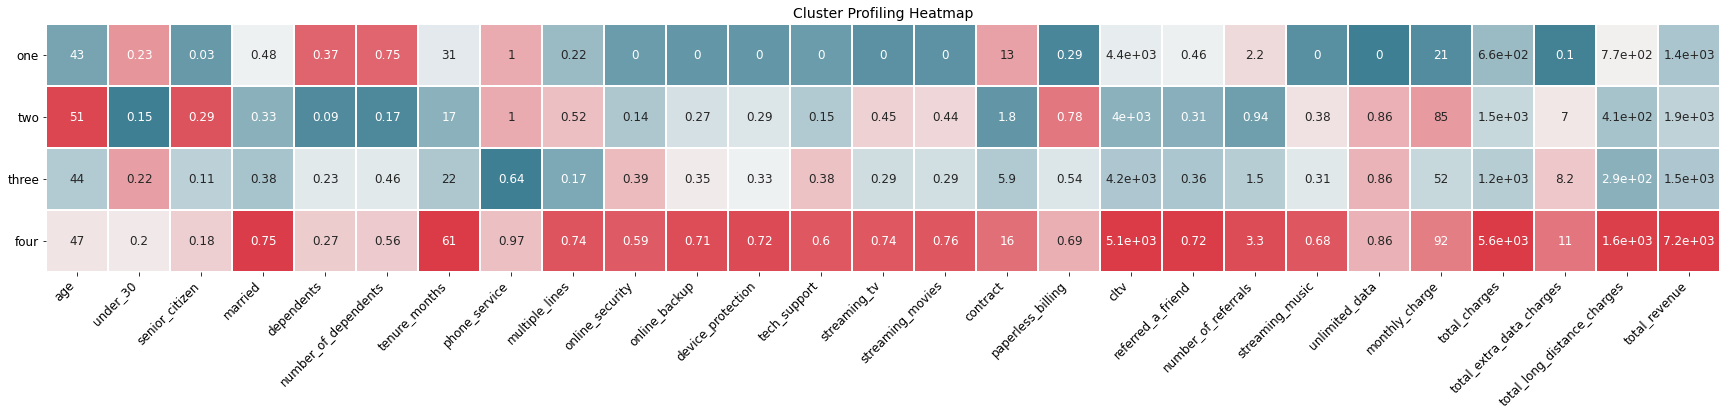

In [94]:
summary_clus = telco_final.groupby('cluster')[clus_col].mean()
summary_clus = summary_clus.rename(index={0:'one',1:'two',2:'three',3:'four'})

plt.figure(figsize=(30, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#ss colour
temp_ss = StandardScaler()
for_heatmap = pd.DataFrame(temp_ss.fit_transform(summary_clus), index=summary_clus.index, 
                           columns=summary_clus.columns)
sns.heatmap(for_heatmap, square=True, cmap=cmap, linewidths=.5, cbar=False, robust=True, 
            annot=round(summary_clus, 2), annot_kws={"fontsize":12})

plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.ylabel('')
plt.title("Cluster Profiling Heatmap", fontsize=14)
plt.show()

In [95]:
telco_final.groupby('under_30').agg({'age':['min', 'max']})

age    
         min max
under_30        
0         30  80
1         19  29

In [96]:
telco_final.groupby('senior_citizen').agg({'age':['min', 'max']})

age    
               min max
senior_citizen        
0               19  64
1               65  80

In [97]:
telco_final.cluster.value_counts()

1    1960
3    1787
2    1769
0    1527
Name: cluster, dtype: int64

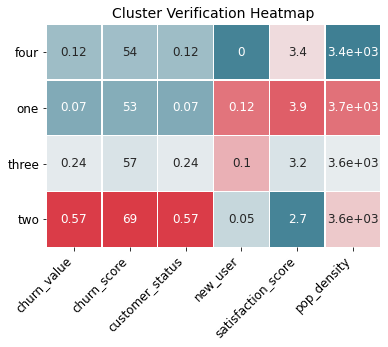

In [104]:
summary = telco_final.groupby('cluster').mean()[ver_col]
summary = summary.rename(index={0:'one',1:'two',2:'three',3:'four'})

plt.figure(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
temp_ss = StandardScaler()
for_heatmap = pd.DataFrame(temp_ss.fit_transform(summary), index=summary.index, 
                           columns=summary.columns)
sns.heatmap(for_heatmap, square=True, cmap=cmap, linewidths=.5, cbar=False, robust=True, 
            annot=round(summary, 2), annot_kws={"fontsize":12})

plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.ylabel('')
plt.title("Cluster Verification Heatmap", fontsize=14)
plt.show()

# Plot By Clusters

In [99]:
sum_clus_num = summary_clus.select_dtypes(exclude='object').columns

In [100]:
telco_final.cluster.replace({0:'one',1:'two',2:'three',3:'four'})

0       three
1         two
2         two
3         two
4         two
        ...  
7038      one
7039    three
7040     four
7041    three
7042     four
Name: cluster, Length: 7043, dtype: object

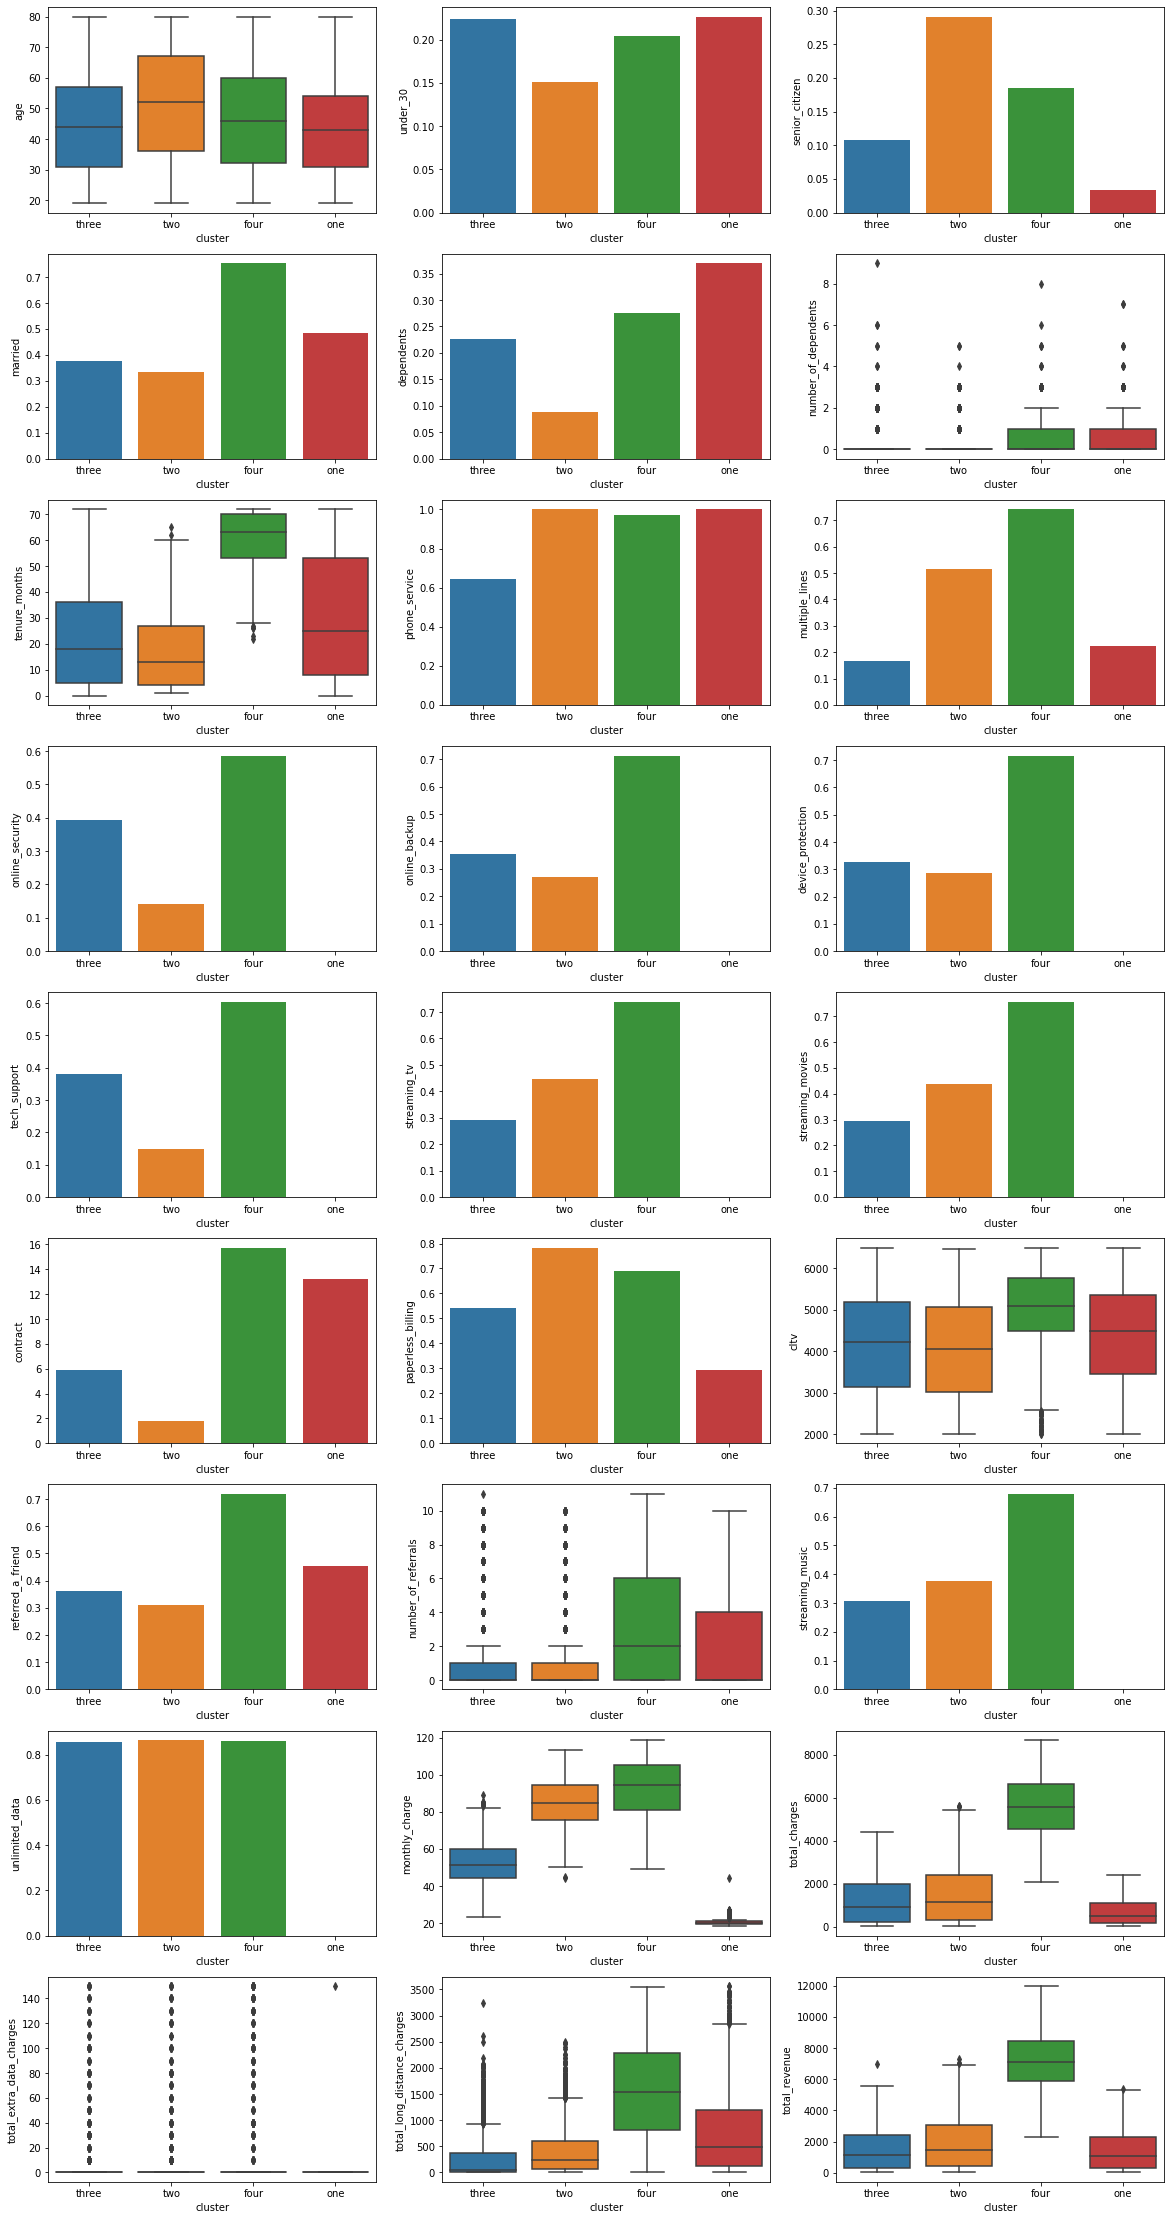

In [102]:
fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(20,40))
ax = ax.flatten()
telco_final.cluster = telco_final.cluster.replace({0:'one',1:'two',2:'three',3:'four'})

for idx, col in enumerate(sum_clus_num):
    if telco_final[col].nunique() <= 4:
        sns.barplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx], ci=None)
    else:
        sns.boxplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx])



# plt.suptitle(t='Boxplot Selected Numerical Data',x=0.5, y = .9, fontsize=16);
# plt.savefig('../images/boxplot_numerical')
plt.show()

In [38]:
summary.customer_status

,customer_status,customer_status
cluster,,
one,0.565306,0.565306
two,0.121433,0.121433
three,0.074001,0.074001
four,0.243640,0.243640


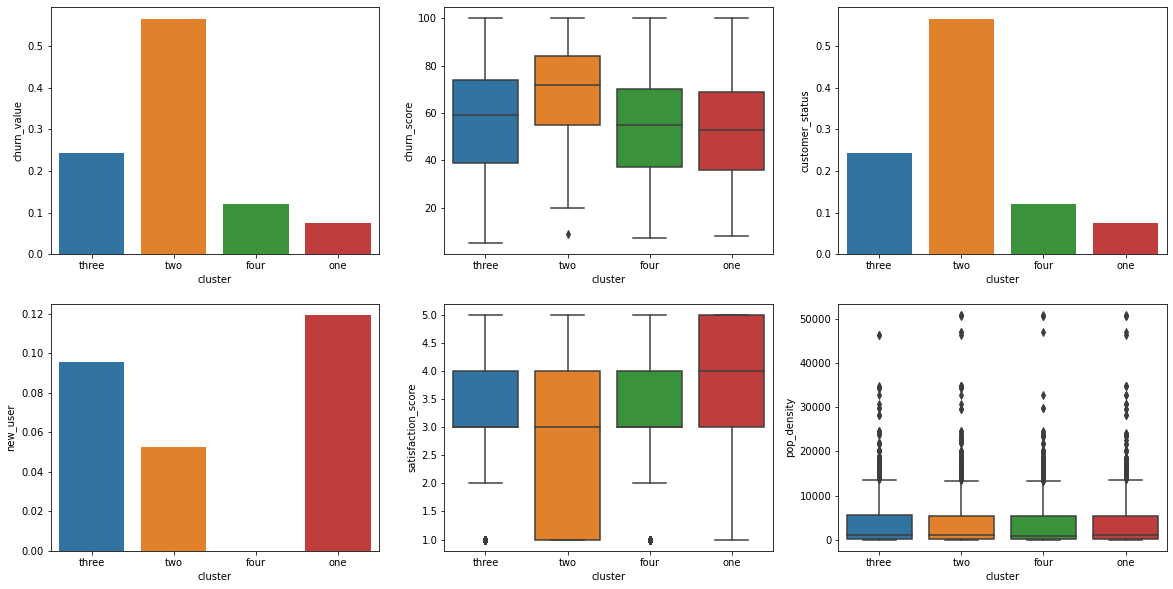

In [108]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax = ax.flatten()
# telco_final.cluster = telco_final.cluster.replace({0:'one',1:'two',2:'three',3:'four'})

for idx, col in enumerate(summary.columns):
    if telco_final[col].nunique() <= 4:
        sns.barplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx], ci=None)
    else:
        sns.boxplot(data=telco_final, y=col, x=telco_final.cluster, ax=ax[idx])



# plt.suptitle(t='Boxplot Selected Numerical Data',x=0.5, y = .9, fontsize=16);
# plt.savefig('../images/boxplot_numerical')
plt.show()